This notebook checks that LUT correction is basically the same as the function correction.

Expects a CSV file called `jet_compare.txt` with columns: `eta`, `etabin`, `lut`, `func`

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['font.size'] = 12

In [2]:
info = np.recfromcsv('jet_compare_int.txt')

In [3]:
info

rec.array([(1, 0, 171, 228, 229.213, 229), (-25, 6, 169, 228, 228.113, 228),
 (-23, 5, 12, 24, 24.5549, 24), ..., (-9, 2, 67, 117, 118.295, 118),
 (-26, 6, 371, 448, 448.764, 448), (-11, 2, 10, 20, 20.3809, 20)], 
          dtype=[('eta', '<i8'), ('etabin', '<i8'), ('ptpre', '<i8'), ('lut', '<i8'), ('func', '<f8'), ('funcint', '<i8')])

In [4]:
info.dtype

dtype((numpy.record, [('eta', '<i8'), ('etabin', '<i8'), ('ptpre', '<i8'), ('lut', '<i8'), ('func', '<f8'), ('funcint', '<i8')]))

# General distributions for sanity 

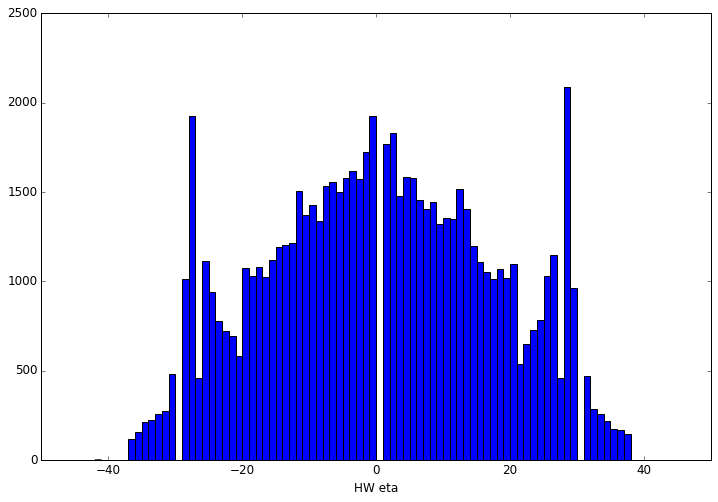

In [49]:
_ = plt.hist(info.eta, bins=85, range=[-42,43])
plt.xlabel('HW eta')

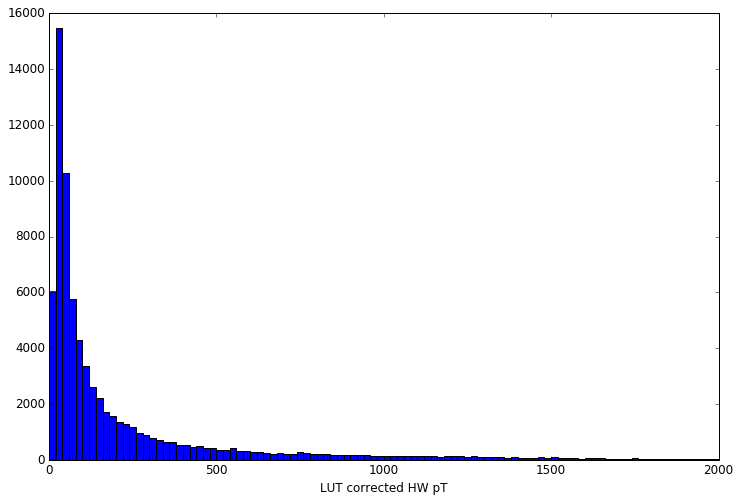

In [50]:
_ = plt.hist(info.lut, bins = 100, range=[0,2000])
plt.xlabel('LUT corrected HW pT')
# plt.yscale('log')

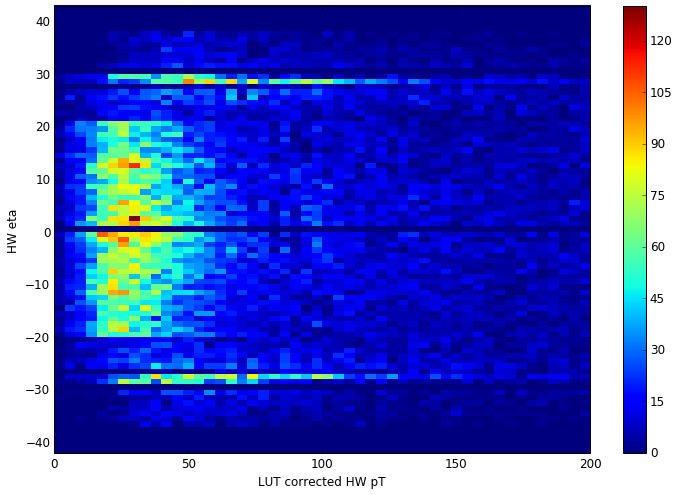

In [51]:
_ = plt.hist2d(info.lut, info.eta, range=[[0, 200], [-42, 43]], bins=(50, 85))
plt.colorbar()
# plt.zscale('log')
plt.xlabel('LUT corrected HW pT')
plt.ylabel('HW eta')

#  Check HW eta -> eta index correct

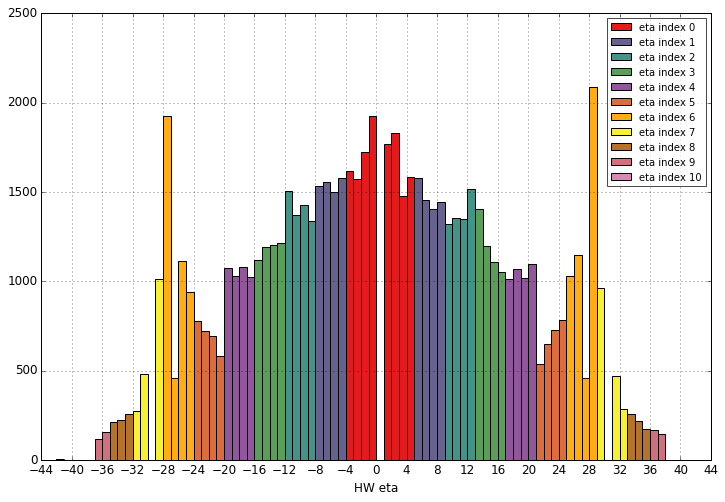

In [52]:
cm = plt.cm.get_cmap('Set1')
for i in range(0, 11):
    n, bins, patches = plt.hist(info.eta[info.etabin==i], bins=85, 
                                range=[-42, 43], color=cm(i/11.), 
                                label='eta index %d' % i)
plt.legend(loc=0, fontsize=10, framealpha=0.7)
plt.xticks(np.arange(-44, 48, 4))
plt.xlim(-44, 44)
plt.grid()
# plt.minorticks_on()
plt.xlabel('HW eta')
plt.savefig('hw_eta_index.pdf')

#  Compare pt from LUT vs pt from function (float)

Note that above 511, we only have 1 factor for the LUT, so we expect deviations from the function version.

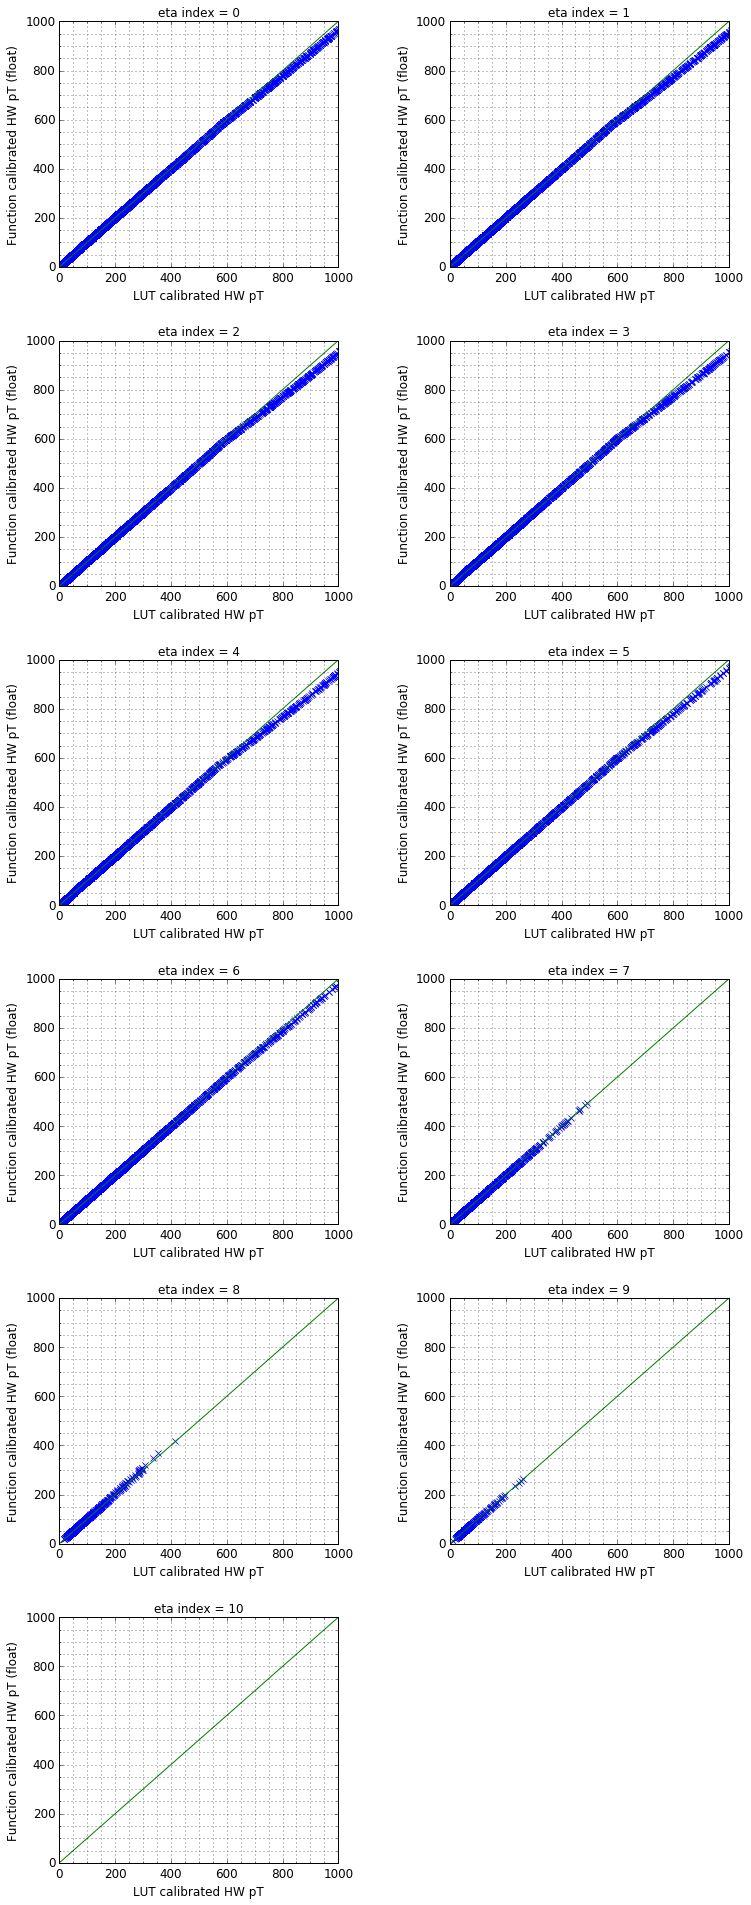

In [53]:
from math import ceil

ieta_range = range(0, 11) 

n_cols = 2
nrows = ceil(1.*len(ieta_range)/n_cols)

fig = plt.figure()
fig.set_size_inches(6*n_cols, len(ieta_range) * 3 )
fig.subplots_adjust(wspace=0.4, hspace=0.3)

limit = 1000

for ind, ieta in enumerate(ieta_range):
    fig.add_subplot(nrows, 2, ind+1)
    mask = info.etabin == ieta
    plt.plot(info.lut[mask], info.func[mask], 'x')
    plt.xlim(0, limit)
    plt.ylim(0, limit)
    plt.plot([0,limit], [0,limit])
    plt.xlabel('LUT calibrated HW pT', fontsize=12)
    plt.ylabel('Function calibrated HW pT (float)', fontsize=12)
    plt.gca().set_title('eta index = %d' % ieta, fontsize=12)
    plt.grid(which='both')
    plt.minorticks_on()
plt.savefig('lut_vs_func.pdf')

## Low-pT zoom in

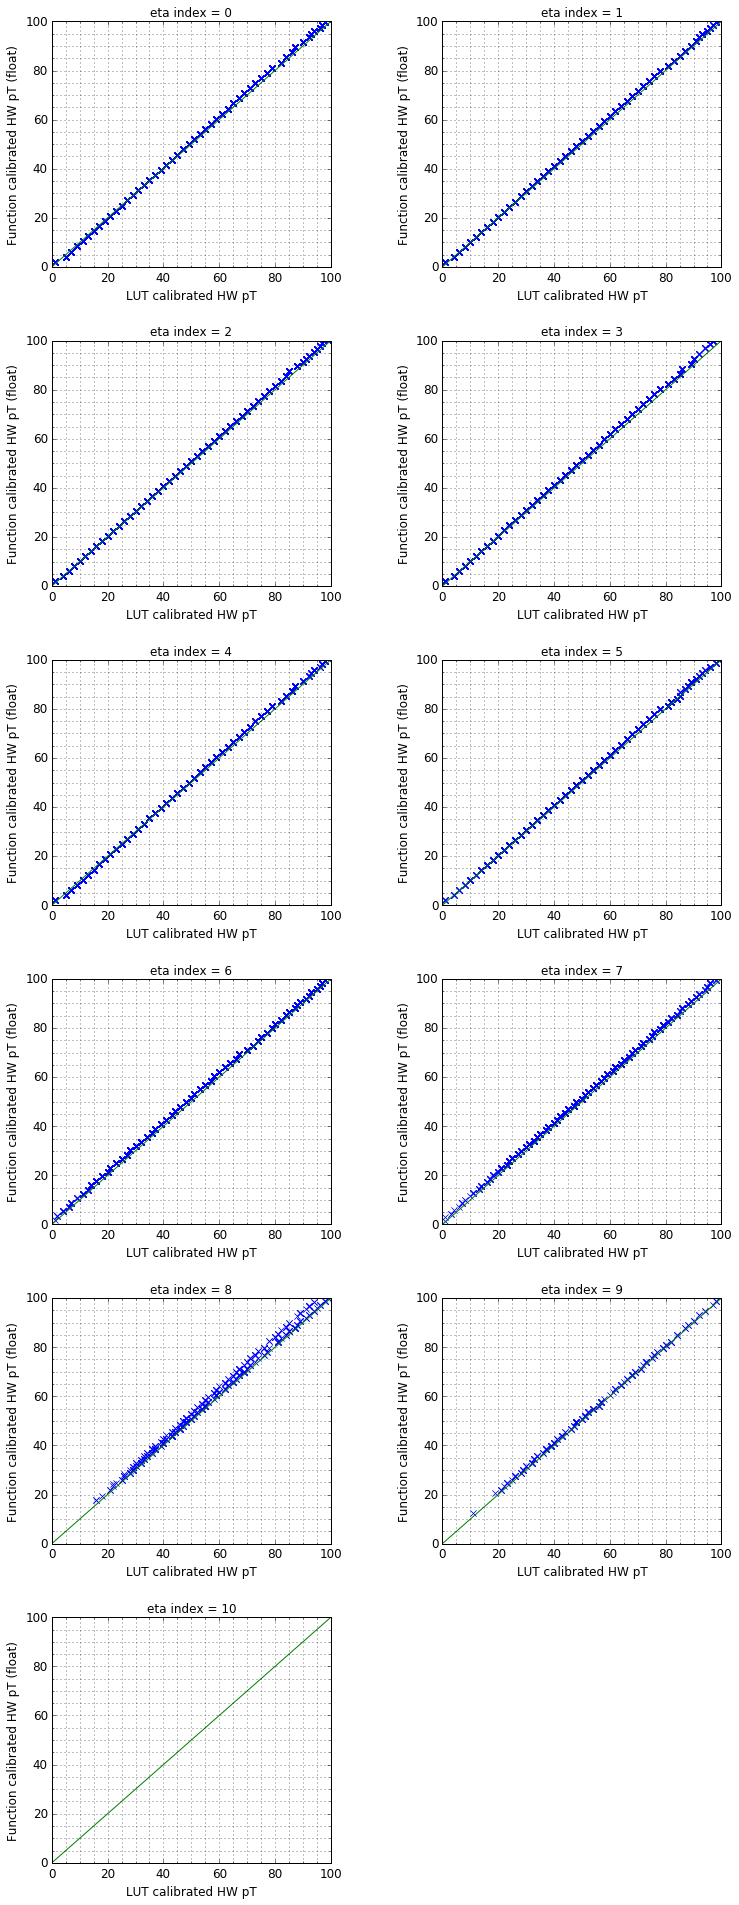

In [54]:
from math import ceil

ieta_range = range(0, 11) 

n_cols = 2
nrows = ceil(1.*len(ieta_range)/n_cols)

fig = plt.figure()
fig.set_size_inches(6*n_cols, len(ieta_range) * 3 )
fig.subplots_adjust(wspace=0.4, hspace=0.3)

limit = 100

for ind, ieta in enumerate(ieta_range):
    fig.add_subplot(nrows, 2, ind+1)
    mask = info.etabin == ieta
    plt.plot(info.lut[mask], info.func[mask], 'x')
    plt.xlim(0, limit)
    plt.ylim(0, limit)
    plt.plot([0,limit], [0,limit])
    plt.xlabel('LUT calibrated HW pT', fontsize=12)
    plt.ylabel('Function calibrated HW pT (float)', fontsize=12)
    plt.gca().set_title('eta index = %d' % ieta, fontsize=12)
    plt.grid(which='both')
    plt.minorticks_on()
plt.savefig('lut_vs_func_zoom.pdf')

## PT ratio

Maybe I should cut so only < 511?

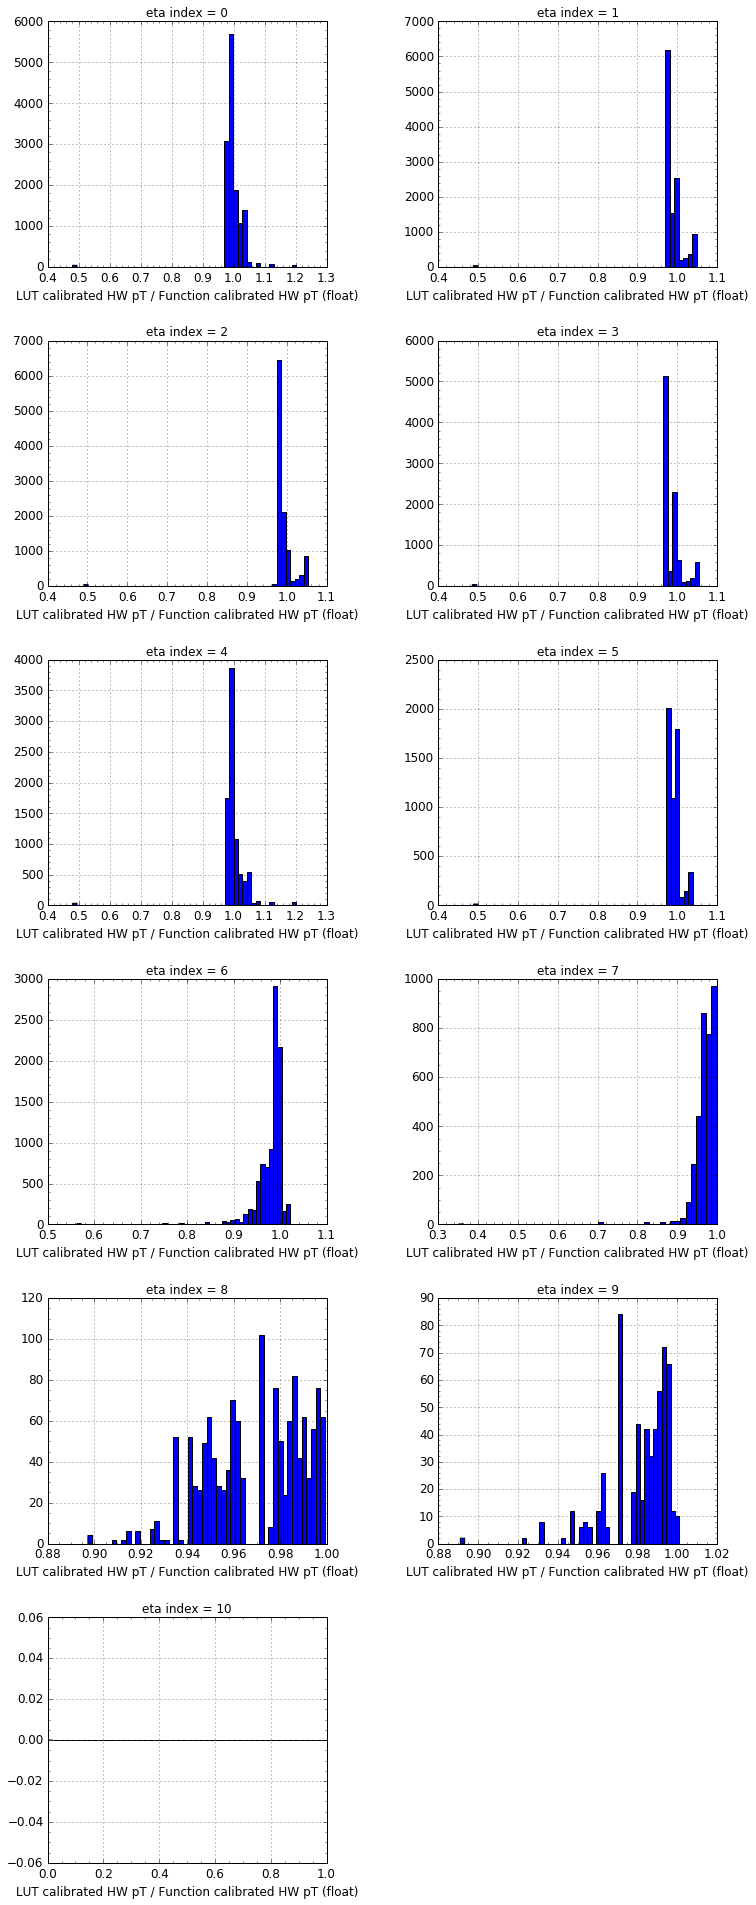

In [55]:
from math import ceil

ieta_range = range(0, 11) 

n_cols = 2
nrows = ceil(1.*len(ieta_range)/n_cols)

fig = plt.figure()
fig.set_size_inches(6*n_cols, len(ieta_range) * 3 )
fig.subplots_adjust(wspace=0.4, hspace=0.3)

limit = 100

for ind, ieta in enumerate(ieta_range):
    fig.add_subplot(nrows, 2, ind+1)
    mask = info.etabin == ieta
    plt.hist(1. * info.lut[mask] / info.func[mask], bins=50)
    plt.xlabel('LUT calibrated HW pT / Function calibrated HW pT (float)', fontsize=12)
    plt.gca().set_title('eta index = %d' % ieta, fontsize=12)
    plt.grid(which='major')
#     plt.ylim(bottom=1)
#     plt.yscale('log', nonposy='clip')
    plt.minorticks_on()
plt.savefig('lut_func_ratio.pdf')

## PT difference

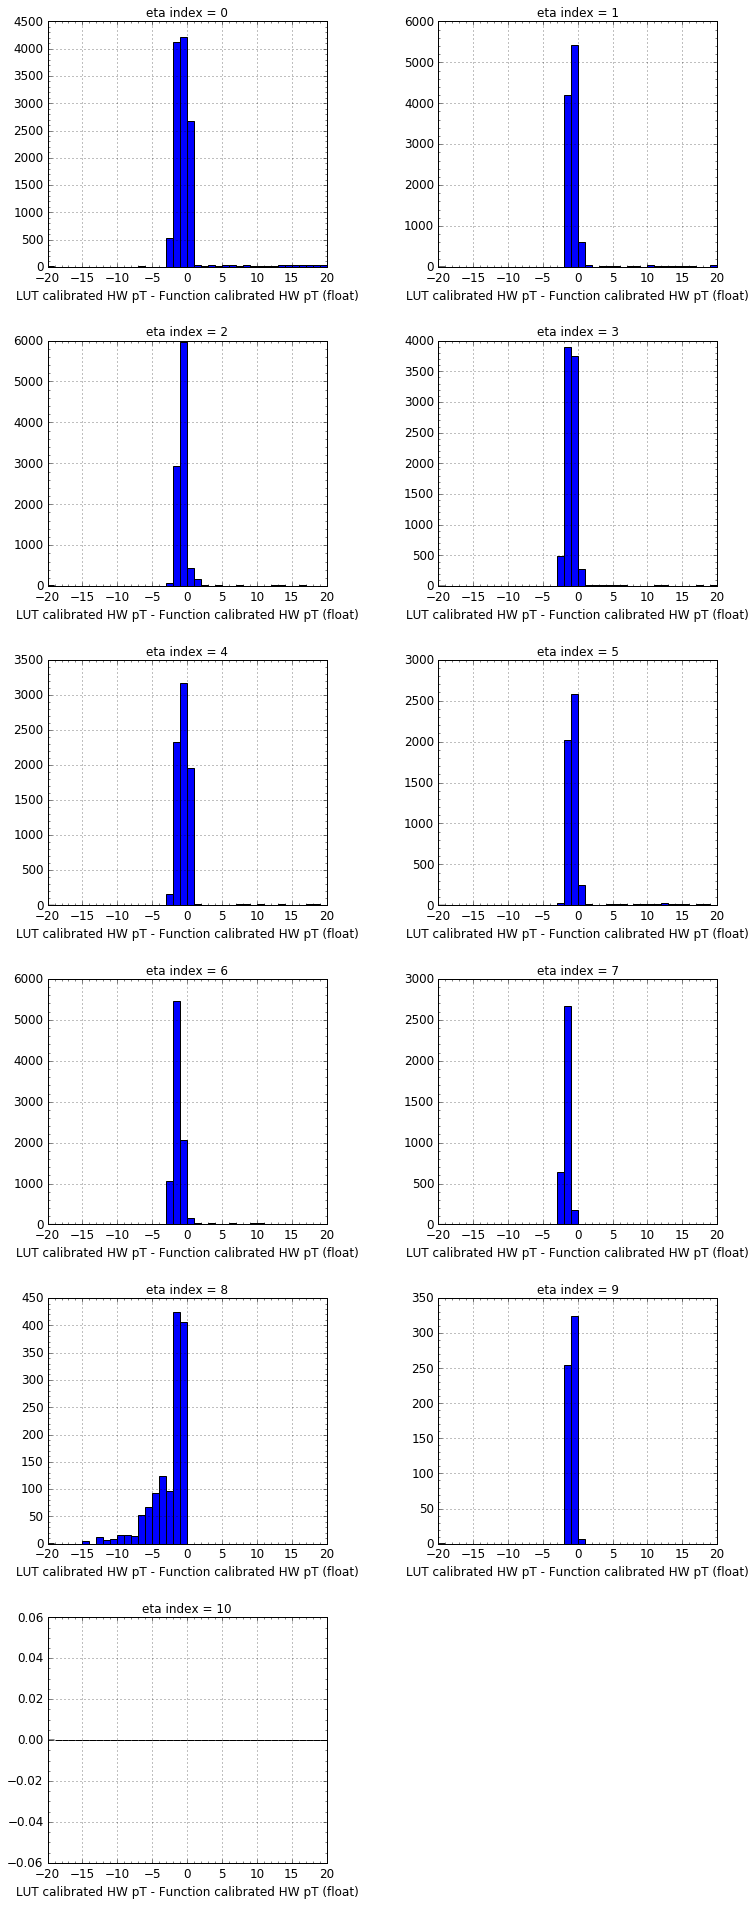

In [5]:
from math import ceil

ieta_range = range(0, 11) 

n_cols = 2
nrows = ceil(1.*len(ieta_range)/n_cols)

fig = plt.figure()
fig.set_size_inches(6*n_cols, len(ieta_range) * 3 )
fig.subplots_adjust(wspace=0.4, hspace=0.3)

limit = 100

for ind, ieta in enumerate(ieta_range):
    fig.add_subplot(nrows, 2, ind+1)
    mask = info.etabin == ieta
    plt.hist(info.lut[mask] - info.func[mask], bins=40, range=[-20, 20])
    plt.xlabel('LUT calibrated HW pT - Function calibrated HW pT (float)', fontsize=12)
    plt.gca().set_title('eta index = %d' % ieta, fontsize=12)
    plt.grid(which='major')
#     plt.ylim(bottom=1)
#     plt.yscale('log', nonposy='clip')
    plt.minorticks_on()
plt.savefig('lut_func_diff.pdf')

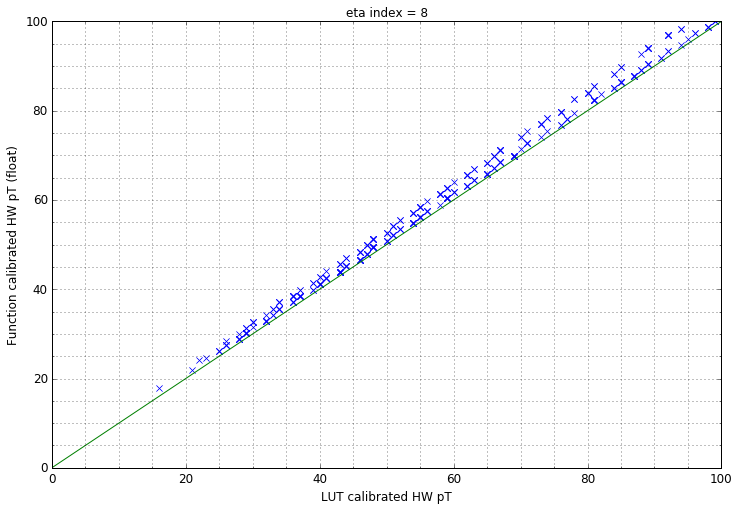

In [15]:
ieta = 8
mask = info.etabin == ieta
plt.plot(info.lut[mask], info.func[mask], 'x')
plt.xlim(0, limit)
plt.ylim(0, limit)
plt.plot([0,limit], [0,limit])
plt.xlabel('LUT calibrated HW pT', fontsize=12)
plt.ylabel('Function calibrated HW pT (float)', fontsize=12)
plt.gca().set_title('eta index = %d' % ieta, fontsize=12)
plt.grid(which='both')
plt.minorticks_on()

In [135]:
mask = (info.lut==62) & (info.etabin==8)
info[mask]

rec.array([(-34, 8, 62, 63.0922), (-34, 8, 62, 63.0922), (-33, 8, 62, 65.5316),
 (-33, 8, 62, 65.5316), (35, 8, 62, 63.0922), (35, 8, 62, 63.0922),
 (33, 8, 62, 65.5316), (33, 8, 62, 65.5316)], 
          dtype=[('eta', '<i8'), ('etabin', '<i8'), ('lut', '<i8'), ('func', '<f8')])

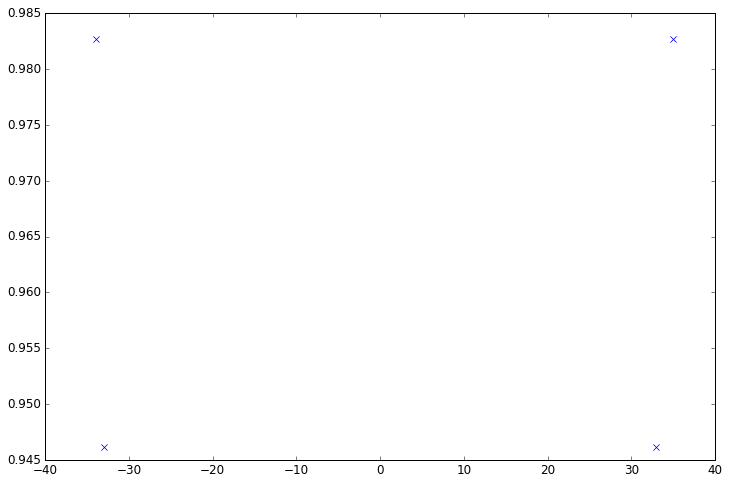

In [134]:
plt.plot(info.eta[mask], info.lut[mask]/info.func[mask], 'x')

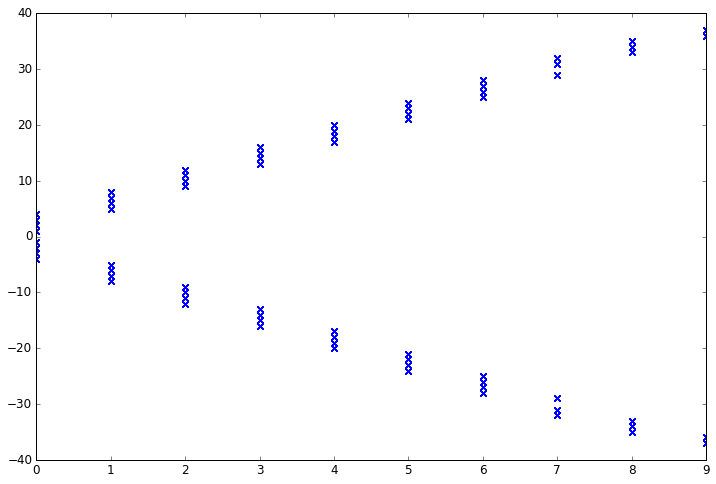

In [130]:
plt.plot(info.etabin, info.eta, 'x')

#  Compare pt from LUT vs pt from function (int)

For the pt from function, we do:

```cpp
l1t::Jet jet2( p42, correction*originalJetPt, jet->hwEta(), jet->hwPhi(), 0);
cout << jet2.hwPt() << endl;
```

so we take the rounded PT

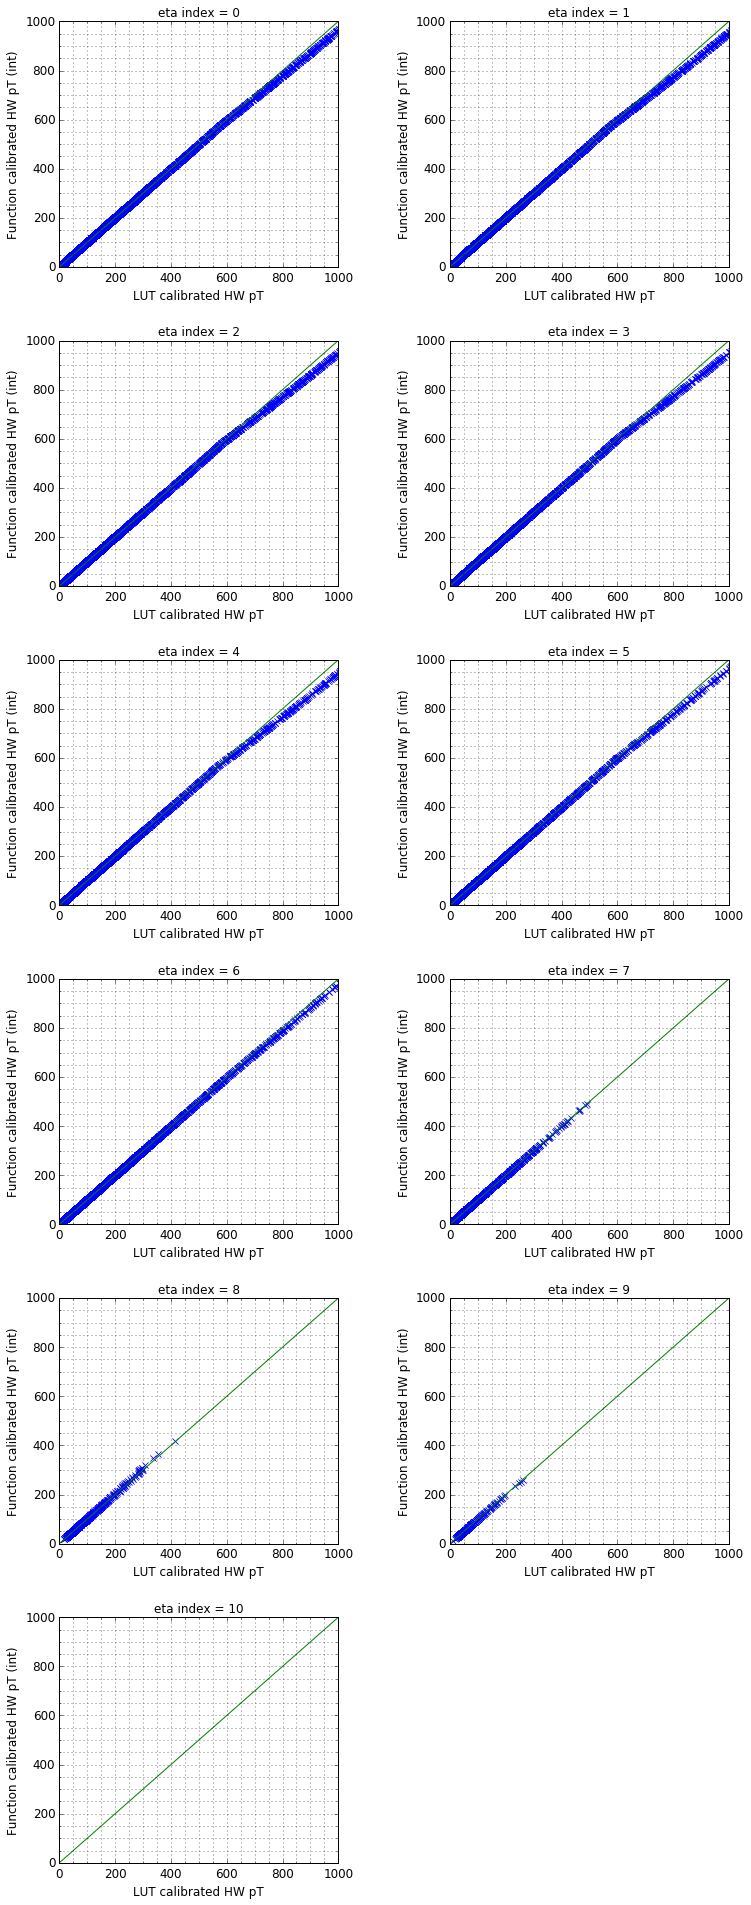

In [57]:
from math import ceil

ieta_range = range(0, 11) 

n_cols = 2
nrows = ceil(1.*len(ieta_range)/n_cols)

fig = plt.figure()
fig.set_size_inches(6*n_cols, len(ieta_range) * 3 )
fig.subplots_adjust(wspace=0.4, hspace=0.3)

limit = 1000

for ind, ieta in enumerate(ieta_range):
    fig.add_subplot(nrows, 2, ind+1)
    mask = info.etabin == ieta
    plt.plot(info.lut[mask], info.funcint[mask], 'x')
    plt.xlim(0, limit)
    plt.ylim(0, limit)
    plt.plot([0,limit], [0,limit])
    plt.xlabel('LUT calibrated HW pT', fontsize=12)
    plt.ylabel('Function calibrated HW pT (int)', fontsize=12)
    plt.gca().set_title('eta index = %d' % ieta, fontsize=12)
    plt.grid(which='both')
    plt.minorticks_on()
plt.savefig('lut_vs_funcInt.pdf')

## Low-pT zoom in

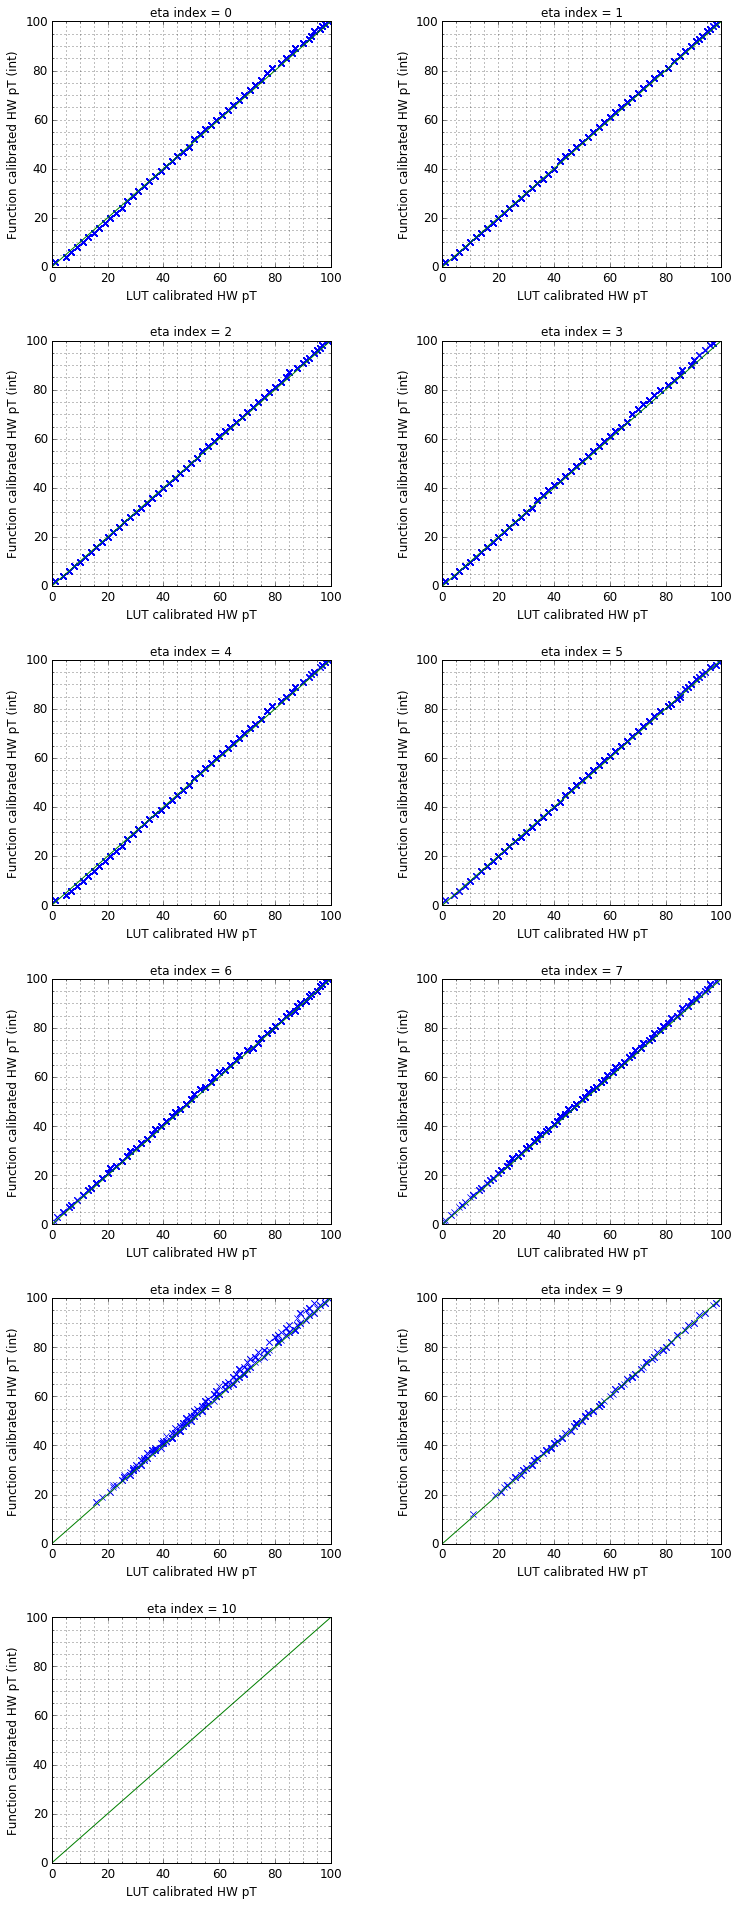

In [58]:
from math import ceil

ieta_range = range(0, 11) 

n_cols = 2
nrows = ceil(1.*len(ieta_range)/n_cols)

fig = plt.figure()
fig.set_size_inches(6*n_cols, len(ieta_range) * 3 )
fig.subplots_adjust(wspace=0.4, hspace=0.3)

limit = 100

for ind, ieta in enumerate(ieta_range):
    fig.add_subplot(nrows, 2, ind+1)
    mask = info.etabin == ieta
    plt.plot(info.lut[mask], info.funcint[mask], 'x')
    plt.xlim(0, limit)
    plt.ylim(0, limit)
    plt.plot([0,limit], [0,limit])
    plt.xlabel('LUT calibrated HW pT', fontsize=12)
    plt.ylabel('Function calibrated HW pT (int)', fontsize=12)
    plt.gca().set_title('eta index = %d' % ieta, fontsize=12)
    plt.grid(which='both')
    plt.minorticks_on()
plt.savefig('lut_vs_funcInt_zoom.pdf')

## PT ratio

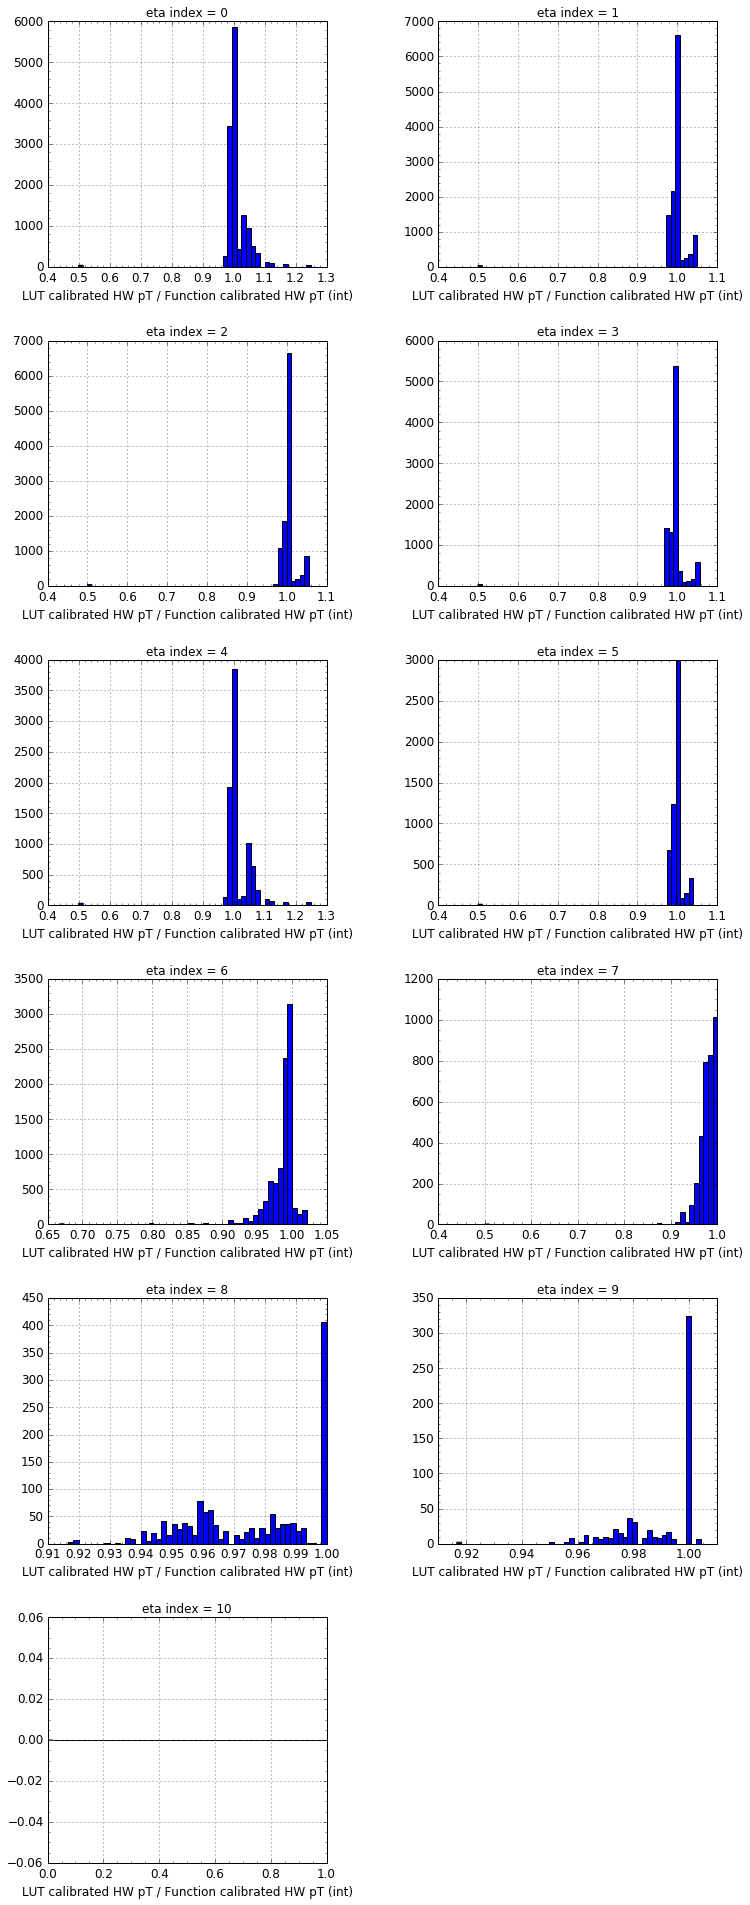

In [59]:
from math import ceil

ieta_range = range(0, 11) 

n_cols = 2
nrows = ceil(1.*len(ieta_range)/n_cols)

fig = plt.figure()
fig.set_size_inches(6*n_cols, len(ieta_range) * 3 )
fig.subplots_adjust(wspace=0.4, hspace=0.3)

limit = 100

for ind, ieta in enumerate(ieta_range):
    fig.add_subplot(nrows, 2, ind+1)
    mask = info.etabin == ieta
    plt.hist(1. * info.lut[mask] / info.funcint[mask], bins=50)
    plt.xlabel('LUT calibrated HW pT / Function calibrated HW pT (int)', fontsize=12)
    plt.gca().set_title('eta index = %d' % ieta, fontsize=12)
    plt.grid(which='major')
#     plt.ylim(bottom=1)
#     plt.yscale('log', nonposy='clip')
    plt.minorticks_on()
plt.savefig('lut_funcInt_ratio.pdf')

## PT difference

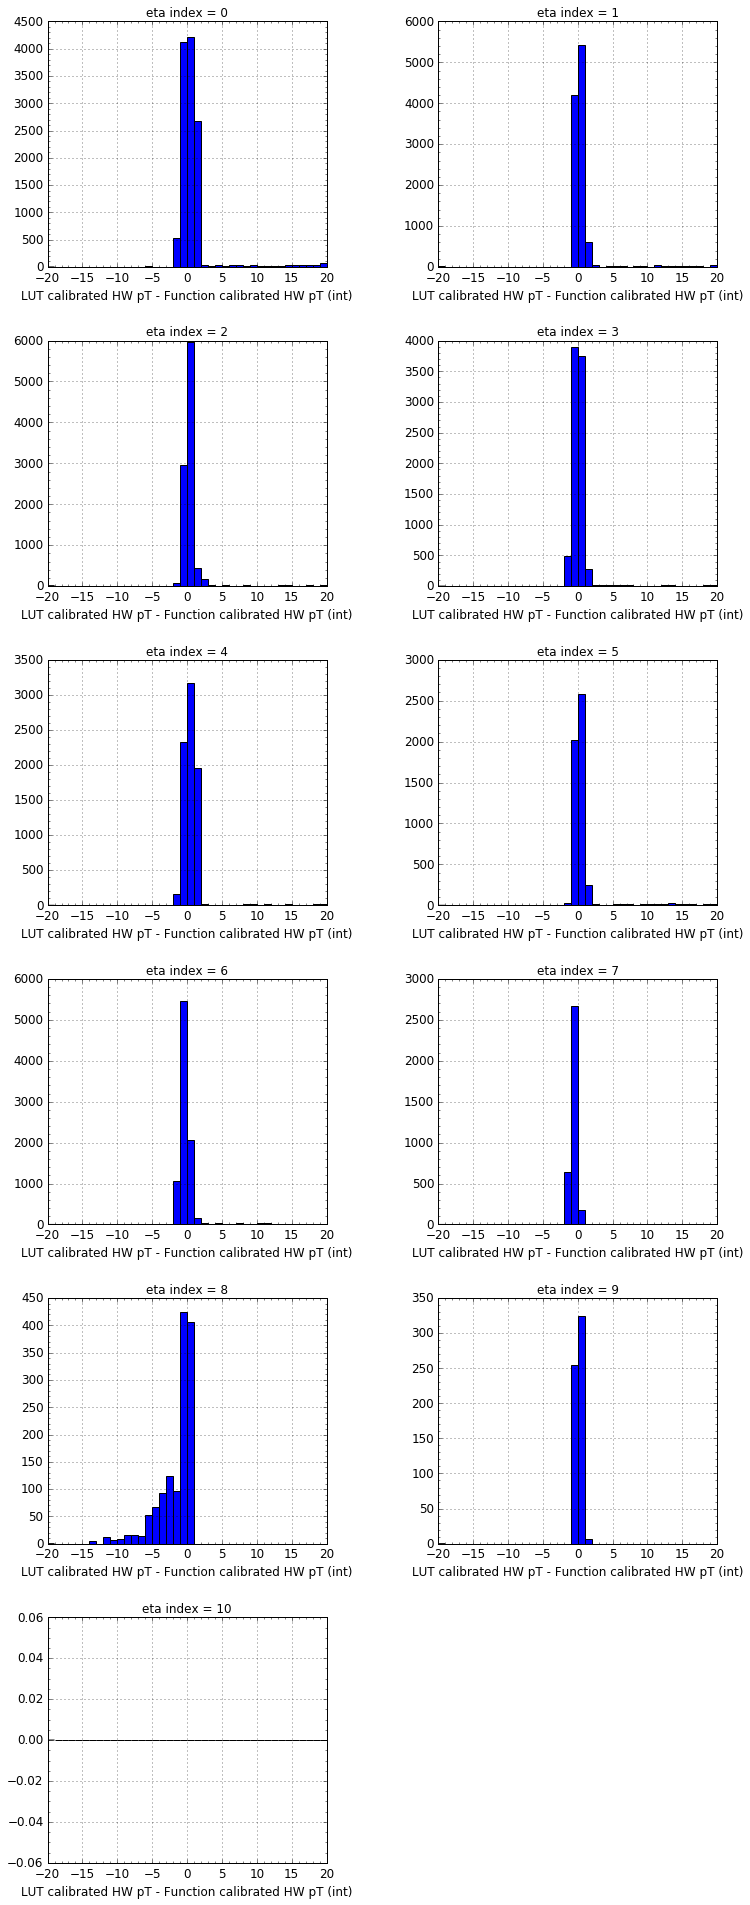

In [6]:
from math import ceil

ieta_range = range(0, 11) 

n_cols = 2
nrows = ceil(1.*len(ieta_range)/n_cols)

fig = plt.figure()
fig.set_size_inches(6*n_cols, len(ieta_range) * 3 )
fig.subplots_adjust(wspace=0.4, hspace=0.3)

limit = 100

for ind, ieta in enumerate(ieta_range):
    fig.add_subplot(nrows, 2, ind+1)
    mask = info.etabin == ieta
    plt.hist(info.lut[mask] - info.funcint[mask], bins=40, range=[-20, 20])
    plt.xlabel('LUT calibrated HW pT - Function calibrated HW pT (int)', fontsize=12)
    plt.gca().set_title('eta index = %d' % ieta, fontsize=12)
    plt.grid(which='major')
#     plt.ylim(bottom=1)
#     plt.yscale('log', nonposy='clip')
    plt.minorticks_on()
plt.savefig('lut_funcInt_diff.pdf')

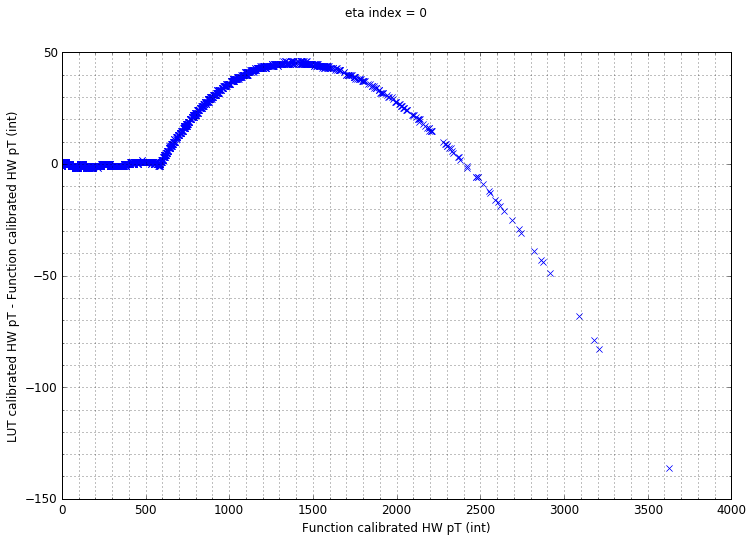

In [61]:
plt.plot(info.funcint[info.etabin==0], (info.lut[info.etabin==0] - info.funcint[info.etabin==0]), 'x')
plt.xlabel('Function calibrated HW pT (int)')
plt.ylabel('LUT calibrated HW pT - Function calibrated HW pT (int)')
plt.suptitle('eta index = 0')
plt.minorticks_on()
plt.grid(which='both')
plt.savefig('lut_funcInt_diff_vs_funcInt.pdf')